# [Dropout and Strides for Larger Models](https://www.kaggle.com/dansbecker/dropout-and-strides-for-larger-models)

**This is Lesson 8 in the [Deep Learning](https://www.kaggle.com/learn/deep-learning) track.**  
At the end of this lesson, you will understand and know how to use stride lengths to make your model faster and reduce memory consumption, as well as dropout to combat overfitting.  
Both of these techniques are especially useful in large models.

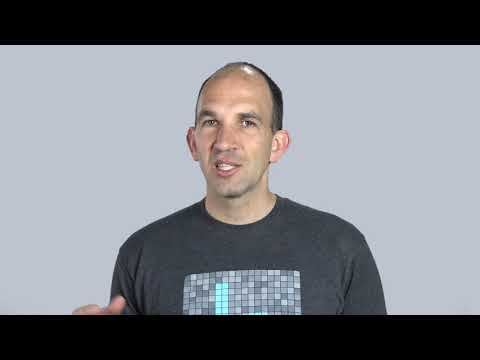

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('fwNLf4t7MR8', width=800, height=450)

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout

/Users/benjamingrove/.pyenv/versions/3.6.1/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
# Prep the data:

img_rows, img_cols = 28, 28
num_classes = 10

def data_prep(raw):
    out_y = keras.utils.to_categorical(raw.label, num_classes)
    
    num_images = raw.shape[0]
    x_as_array = raw.values[:,1:]
    x_shaped_array = x_as_array.reshape(num_images, img_rows, img_cols, 1)
    out_x = x_shaped_array / 255
    return out_x, out_y

train_size = 30000
train_file = 'inputs/digit_recognizer/train.csv'
raw_data = pd.read_csv(train_file)

In [4]:
# Build the model:

x, y = data_prep(raw_data)
model = Sequential()
model.add(Conv2D(30, kernel_size=(3,3),
                strides=2,
                activation='relu',
                input_shape=(img_rows, img_cols, 1)))
model.add(Dropout(0.5))
model.add(Conv2D(30, kernel_size=(3,3), strides=2, activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [5]:
# Compile and fit the model:
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer='adam',
             metrics=['accuracy'])

model.fit(x, y,
         batch_size=128,
         epochs=2,
         validation_split=0.2)

Train on 33600 samples, validate on 8400 samples
Epoch 1/2
33600/33600 [==============================] - 5s 150us/step - loss: 0.6150 - acc: 0.8056 - val_loss: 0.2165 - val_acc: 0.9385
Epoch 2/2
33600/33600 [==============================] - 5s 145us/step - loss: 0.2703 - acc: 0.9173 - val_loss: 0.1401 - val_acc: 0.9589


# [Exercise: Dropout and Strides For Larger Models](https://www.kaggle.com/dansbecker/exercise-dropout-and-strides-for-larger-models/)

You've built a model to identify clothing types in the MNIST for Fashion dataset.  
Now you will make your model bigger, specify larger stride lengths and apply dropout.  
These changes will make your model faster and more accurate.
This is the last step in the Deep Learning Track.

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.python import keras

img_rows, img_cols = 28, 28
num_classes = 10

def prep_data(raw, train_size, val_size):
    y = raw[:, 0]
    out_y = keras.utils.to_categorical(y, num_classes)
    x = raw[:,1:]
    num_images = raw.shape[0]
    out_x = x.reshape(num_images, img_rows, img_cols, 1)
    out_x = out_x / 255
    return out_x, out_y

fashion_file = 'inputs/fashionmnist/train.csv'
fashion_data = np.loadtxt(fashion_file, skiprows=1, delimiter=',')
x, y = prep_data(fashion_data, train_size=50000, val_size=5000)

### Sample Model Code

In [7]:
fashion_model = Sequential()
fashion_model.add(Conv2D(12, kernel_size=(3, 3), strides=2, activation='relu',
                        input_shape=(img_rows, img_cols, 1)))
fashion_model.add(Conv2D(12, (3, 3), strides=2, activation='relu'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='relu'))
fashion_model.add(Dense(num_classes, activation='softmax'))

fashion_model.compile(loss=keras.losses.categorical_crossentropy,
                     optimizer='adam',
                     metrics=['accuracy'])
batch_size = 128
epochs = 3
fashion_model.fit(x, y,
                 batch_size=batch_size,
                 epochs=epochs,
                 validation_split = 0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/3
48000/48000 [==============================] - 3s 72us/step - loss: 0.6665 - acc: 0.7657 - val_loss: 0.4930 - val_acc: 0.8241
Epoch 2/3
48000/48000 [==============================] - 3s 66us/step - loss: 0.4475 - acc: 0.8385 - val_loss: 0.4275 - val_acc: 0.8498
Epoch 3/3
48000/48000 [==============================] - 3s 65us/step - loss: 0.3991 - acc: 0.8565 - val_loss: 0.3941 - val_acc: 0.8604


### Adding Strides

Your turn!  
Specify and fit a model much like the one above, but specify a stride length of 2 for each convolutional layer.  
Call your new model `fashion_model_1`.

In [9]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout

fashion_model_1 = Sequential()
fashion_model_1.add(Conv2D(12, kernel_size=(3, 3), strides=2,
                          activation='relu',
                          input_shape=(img_rows, img_cols, 1)))
fashion_model_1.add(Conv2D(12, (3, 3), strides=2, activation='relu'))
fashion_model_1.add(Flatten())
fashion_model_1.add(Dense(128, activation='relu'))
fashion_model_1.add(Dense(num_classes, activation='softmax'))

fashion_model_1.compile(loss=keras.losses.categorical_crossentropy,
                        optimizer='adam',
                        metrics=['accuracy'])

fashion_model_1.fit(x, y,
                  batch_size=128,
                  epochs=2,
                  validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/2
48000/48000 [==============================] - 4s 75us/step - loss: 0.6743 - acc: 0.7617 - val_loss: 0.5064 - val_acc: 0.8188
Epoch 2/2
48000/48000 [==============================] - 3s 66us/step - loss: 0.4339 - acc: 0.8428 - val_loss: 0.4222 - val_acc: 0.8523


### Make Model Larger